In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, svm, model_selection, neighbors, ensemble
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
# import shap
# import skater

In [2]:
# print file available
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Datas load and vizualisation

In [2]:
# dataset read
# df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [11]:
df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [12]:
df['Groupe'] = pd.cut(df['age'], [0,13,20,60,100], labels=['Enfant', 'Adolescent', 'Adulte', 'Personne âgée'])

In [23]:
df = df.rename(columns={'age': 'A'})

In [25]:
df['A'] = (df['A']-df['A'].min())/(df['A'].max()-df['A'].min())

In [26]:
df['A']

0      0.636364
1      0.272727
2      0.454545
3      0.181818
4      0.454545
         ...   
294    0.400000
295    0.272727
296    0.090909
297    0.090909
298    0.181818
Name: A, Length: 299, dtype: float64

In [4]:
# print first lines dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# looking for correlation between variables
correlation = df.corr()
correlation.style.background_gradient(cmap='Blues')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


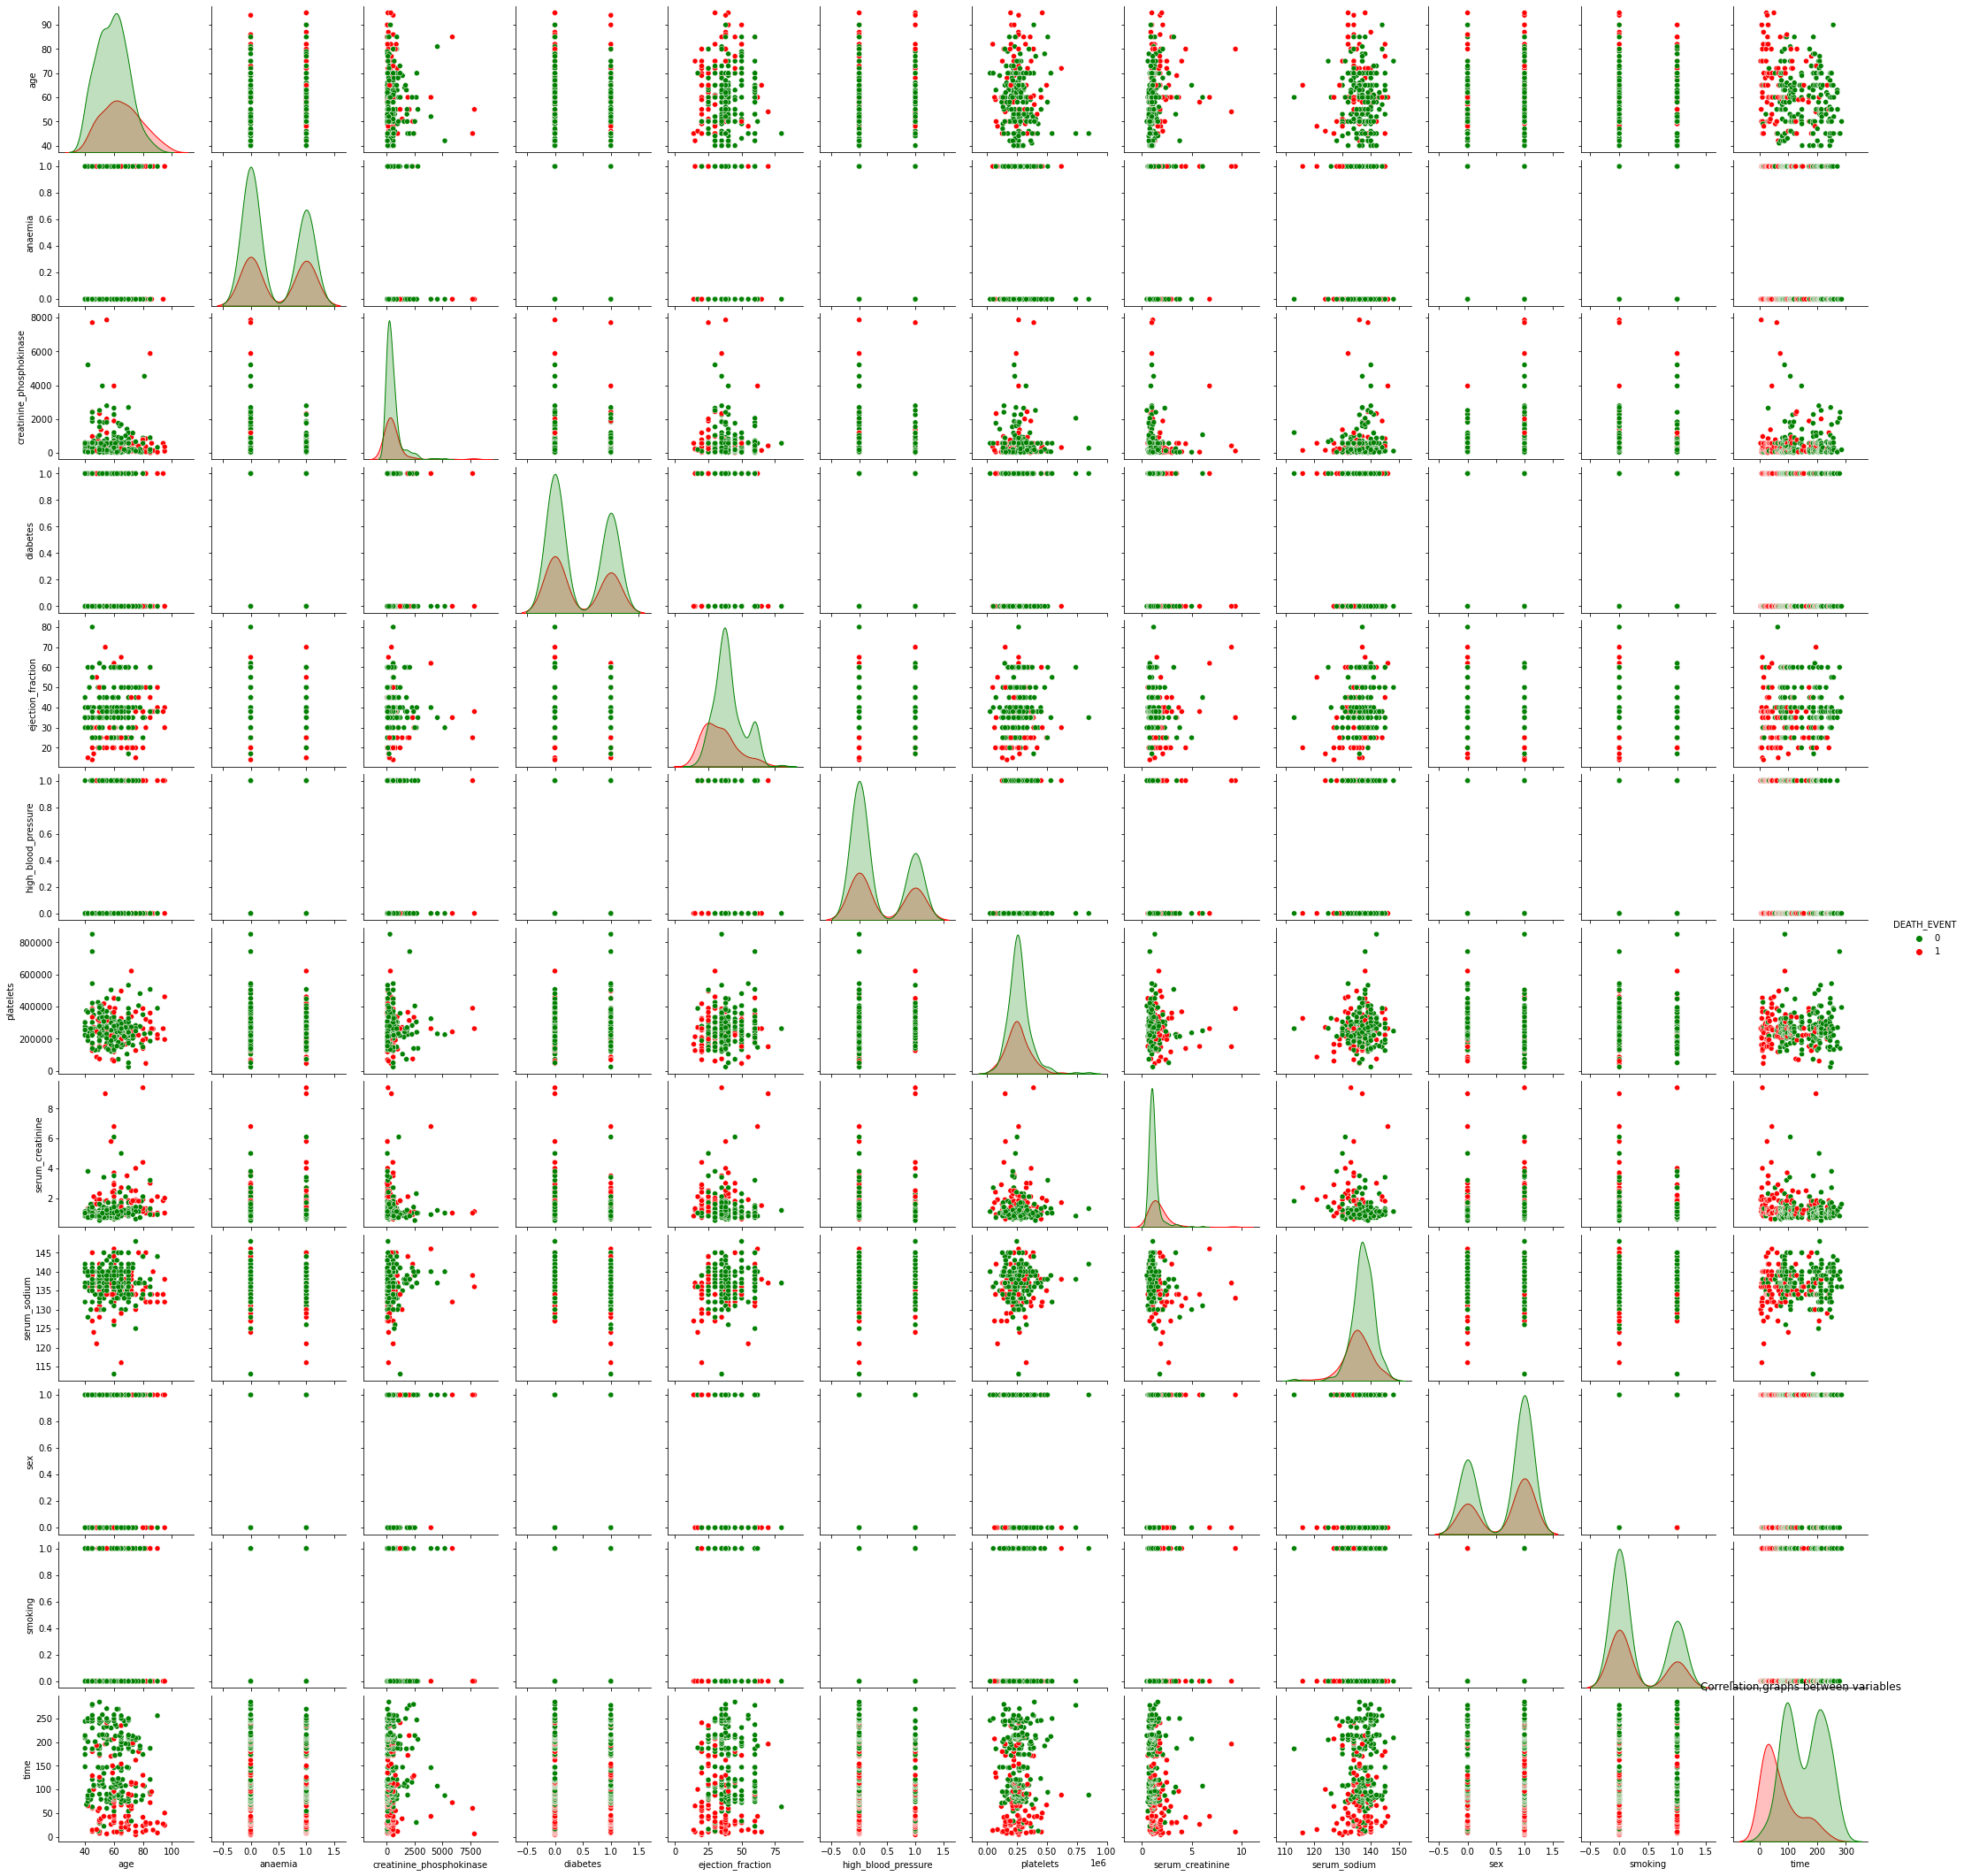

In [7]:
# looking for correlation between variable
sns.pairplot(df, hue="DEATH_EVENT", palette=["g", "r"])
plt.title('Correlation graphs between variables');

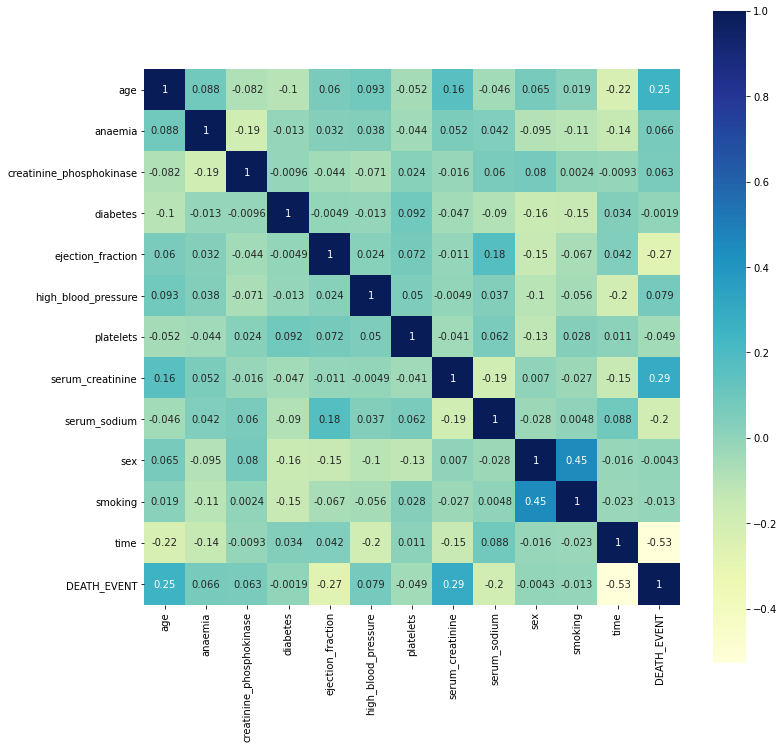

In [56]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), square=True, annot=True, cmap="YlGnBu");

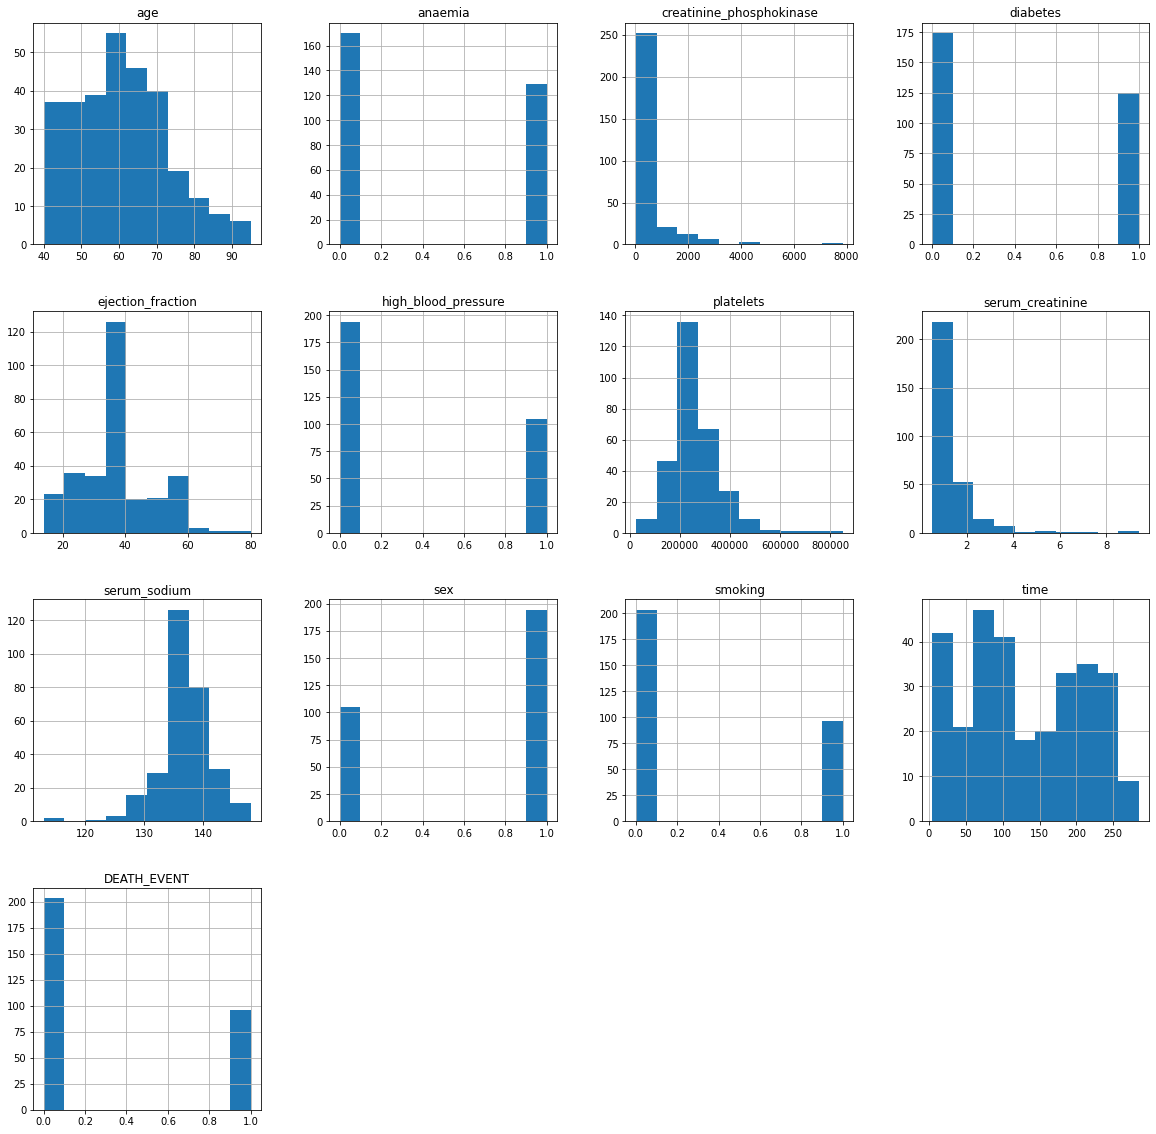

In [49]:
df.hist(figsize = (20,20));

## Preprocessing

In [57]:
# target and feats selection
target = df['DEATH_EVENT']
# feats = df.drop(['DEATH_EVENT'], axis=1)
feats = df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]

In [58]:
# Separation of data sets for training
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=101)

In [59]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN model

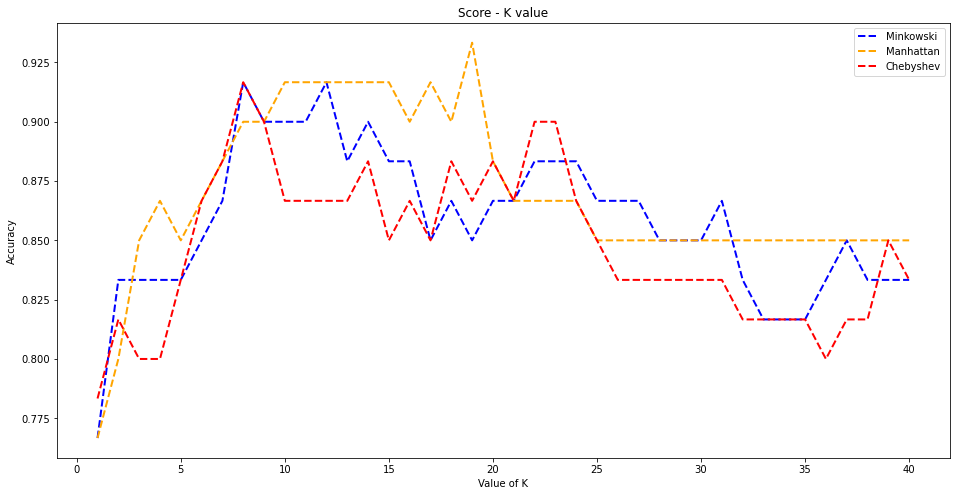

In [60]:
# searching best parameters

score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))
    

# Plot parameters Accuracy vs K
plt.figure(figsize=(16,8))
plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - K value')  
plt.xlabel('Value of K')  
plt.ylabel('Accuracy') 
plt.legend();

In [61]:
# Accuracy score in function of K
pd.DataFrame({'K_value' : range(1, 41),
              'score_minko' : score_minko,
              'score_man' : score_man,
              'score_cheb' : score_cheb}).style.background_gradient(cmap='Greens').set_precision(3).highlight_max(axis=0, color='blue')

,K_value,score_minko,score_man,score_cheb
0,1,0.767,0.767,0.783
1,2,0.833,0.800,0.817
2,3,0.833,0.850,0.800
3,4,0.833,0.867,0.800
4,5,0.833,0.850,0.833
5,6,0.850,0.867,0.867
6,7,0.867,0.883,0.883
7,8,0.917,0.900,0.917
8,9,0.900,0.900,0.900
9,10,0.900,0.917,0.867


## SVM

### searching best parameters

In [62]:
# Creating a clf classifier without parameters
clf = svm.SVC()

# Algorithm training on the training set
clf.fit(X_train, y_train)

# Finding the best hyperparameters
parametres = {'C':[0.1,1,10,50], 'kernel':['rbf','linear']}
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('The model that provides the best prediction has for parameters :',grid_clf.best_params_)

                           params  mean_test_score
0     {'C': 0.1, 'kernel': 'rbf'}         0.790603
1  {'C': 0.1, 'kernel': 'linear'}         0.661082
2       {'C': 1, 'kernel': 'rbf'}         0.824291
3    {'C': 1, 'kernel': 'linear'}         0.820035
4      {'C': 10, 'kernel': 'rbf'}         0.820124
5   {'C': 10, 'kernel': 'linear'}         0.811613
6      {'C': 50, 'kernel': 'rbf'}         0.824291
7   {'C': 50, 'kernel': 'linear'}         0.807447
The model that provides the best prediction has for parameters : {'C': 1, 'kernel': 'rbf'}


### Application of best hyperparameters

In [63]:
# Prediction of test features and creation of the confusion matrix
clf = svm.SVC(C=50, kernel='linear')
clf.fit(X_train, y_train)

# Confusion matrix
y_pred = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Real class'], colnames=['Predicted class']).style.background_gradient(cmap='Blues')

Predicted class,0,1
Real class,,
0,40,5
1,3,12


## Random Forest

In [64]:
# Creating a clf classifier without parameters
clf = ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)

# Finding the best hyperparameters
parametres = {'max_features':[None, "sqrt", "log2"], 'min_samples_split':list(range(2, 32, 2))}
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('The model that provides the best prediction has for parameters :',grid_clf.best_params_)

                                               params  mean_test_score
0      {'max_features': None, 'min_samples_split': 2}         0.828546
1      {'max_features': None, 'min_samples_split': 4}         0.828546
2      {'max_features': None, 'min_samples_split': 6}         0.820124
3      {'max_features': None, 'min_samples_split': 8}         0.828457
4     {'max_features': None, 'min_samples_split': 10}         0.836879
5     {'max_features': None, 'min_samples_split': 12}         0.840957
6     {'max_features': None, 'min_samples_split': 14}         0.836791
7     {'max_features': None, 'min_samples_split': 16}         0.828457
8     {'max_features': None, 'min_samples_split': 18}         0.832624
9     {'max_features': None, 'min_samples_split': 20}         0.828457
10    {'max_features': None, 'min_samples_split': 22}         0.811791
11    {'max_features': None, 'min_samples_split': 24}         0.811791
12    {'max_features': None, 'min_samples_split': 26}         0.815957
13    

In [35]:
# Prediction of test features and creation of the confusion matrix
clf = ensemble.RandomForestClassifier(min_samples_split=4, max_features='log2')
clf.fit(X_train, y_train)

# Confusion matrix
y_pred = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Real class'], colnames=['Predicted class']).style.background_gradient(cmap='Blues')

Predicted class,0,1
Real class,,
0,40,5
1,3,12


In [36]:
# features importance
features_importance = {}

for feature, importance in zip(feats.columns, clf.feature_importances_):
    features_importance[feature] = importance
    
importances = pd.DataFrame.from_dict(features_importance, orient='index').rename(columns={0:'importance'})
importances = importances.sort_values(by='importance', ascending=False)

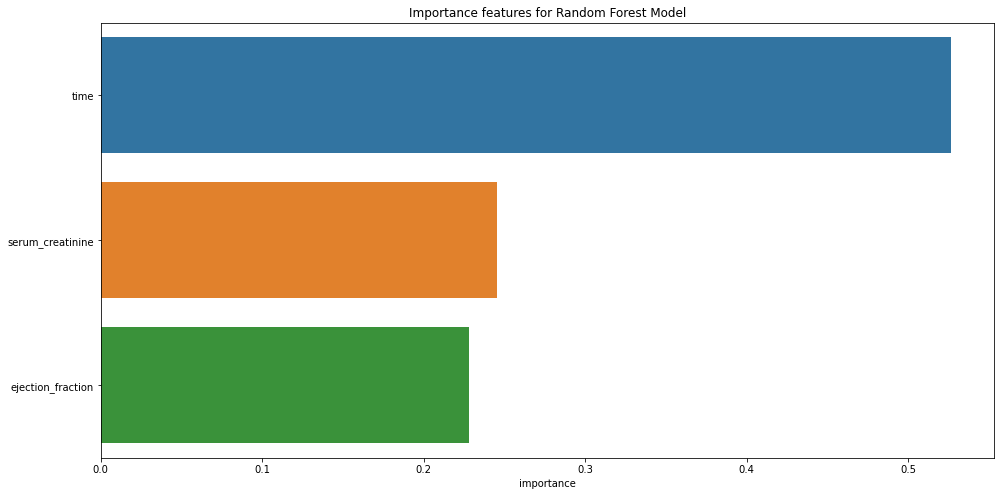

In [37]:
plt.figure(figsize=(16,8))
plt.title('Importance features for Random Forest Model')
sns.barplot(data=importances, y=importances.index.to_list(), x='importance');

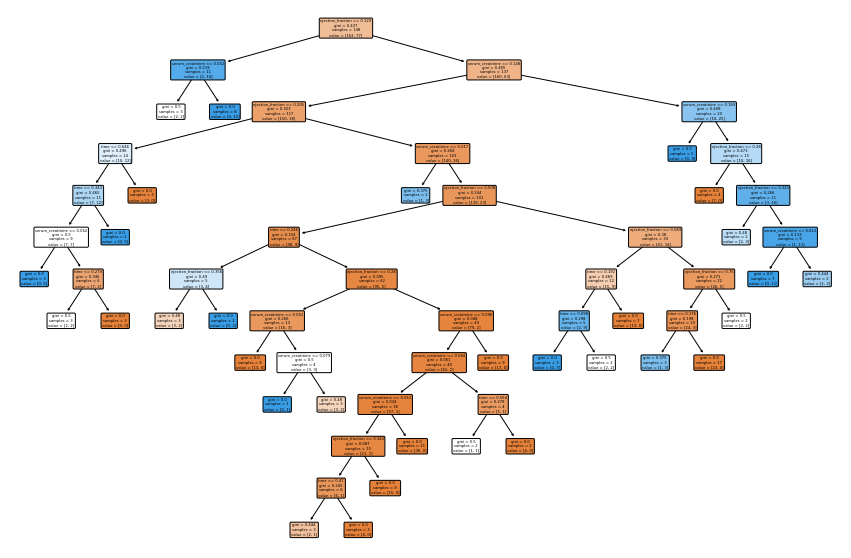

In [38]:
# tree Random Forest display
fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0], 
          feature_names=feats.columns.to_list(),
          class_names=None, 
          filled=True, impurity=True, 
          rounded=True);

## Decision Tree

In [39]:
# Creating a clf classifier without parameters
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Finding the best hyperparameters
parametres = {'criterion':["gini", "entropy"], 'max_depth':list(range(2, 32, 2))}

grid_dt_clf = model_selection.GridSearchCV(estimator=dt_clf, param_grid=parametres)

grille = grid_dt_clf.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('The model that provides the best prediction has for parameters :',grid_dt_clf.best_params_)

                                       params  mean_test_score
0       {'criterion': 'gini', 'max_depth': 2}         0.811702
1       {'criterion': 'gini', 'max_depth': 4}         0.811791
2       {'criterion': 'gini', 'max_depth': 6}         0.828369
3       {'criterion': 'gini', 'max_depth': 8}         0.798936
4      {'criterion': 'gini', 'max_depth': 10}         0.786525
5      {'criterion': 'gini', 'max_depth': 12}         0.799025
6      {'criterion': 'gini', 'max_depth': 14}         0.790603
7      {'criterion': 'gini', 'max_depth': 16}         0.794858
8      {'criterion': 'gini', 'max_depth': 18}         0.807358
9      {'criterion': 'gini', 'max_depth': 20}         0.786436
10     {'criterion': 'gini', 'max_depth': 22}         0.794858
11     {'criterion': 'gini', 'max_depth': 24}         0.794770
12     {'criterion': 'gini', 'max_depth': 26}         0.803103
13     {'criterion': 'gini', 'max_depth': 28}         0.803280
14     {'criterion': 'gini', 'max_depth': 30}         0

In [40]:
# Prediction of test features and creation of the confusion matrix
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=6)
dt_clf.fit(X_train, y_train)

# Confusion matrix
y_pred = dt_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Real class'], colnames=['Predicted class']).style.background_gradient(cmap='Blues')

Predicted class,0,1
Real class,,
0,41,4
1,6,9


In [41]:
# features importance
features_importance = {}

for feature, importance in zip(feats.columns, dt_clf.feature_importances_):
    features_importance[feature] = importance
    
importances = pd.DataFrame.from_dict(features_importance, orient='index').rename(columns={0:'importance'})
importances = importances.sort_values(by='importance', ascending=False)

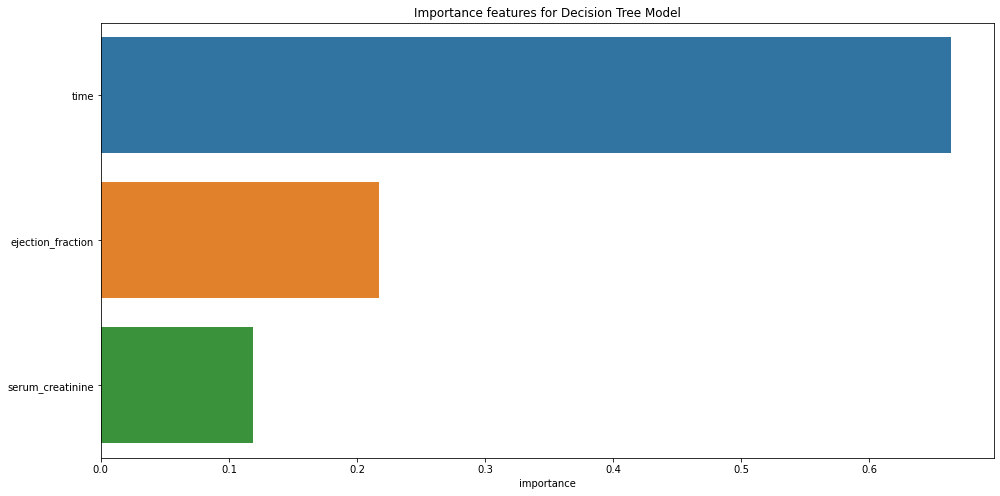

In [42]:
plt.figure(figsize=(16,8))
plt.title('Importance features for Decision Tree Model')
sns.barplot(data=importances, y=importances.index.to_list(), x='importance');

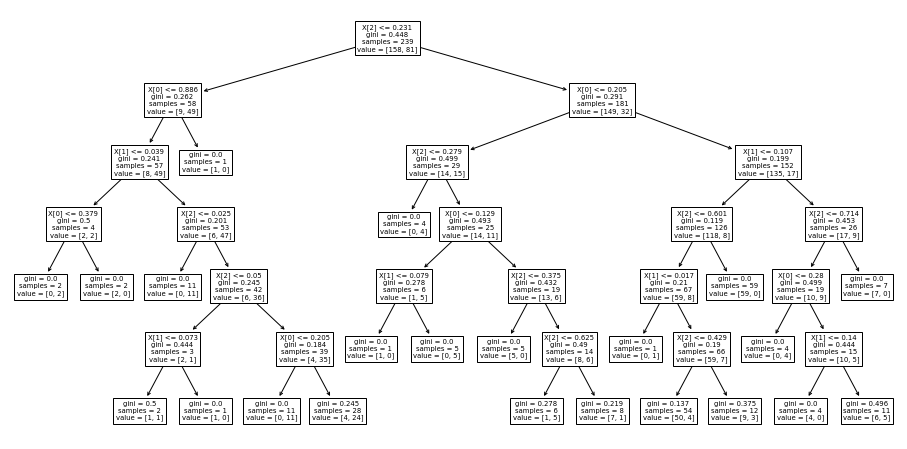

In [43]:
# tree Decision Tree display
plt.figure(figsize=(16,8))
tree.plot_tree(dt_clf);